#  Self Study 3

In this self study we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.datasets import fetch

C:\Users\inigo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='C:/Users/inigo/Desktop/AAU/Cursos/2nd semester/Machine Learning/Self Study')

C:\Users\inigo\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The data has .data and .target attributes. The following gives us some basic information on the data:

In [23]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



The mnist.data is represented as a Pandas dataframe. The following code expects mnist.data to be a plain np.array, which we get simply by running:

In [4]:
mnist.data=np.array(mnist.data)

We can plot individual datapoints as follows:

Value of datapoint no. 4:
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 

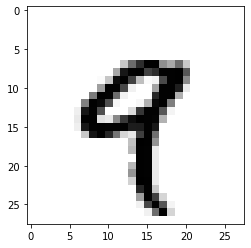

In [25]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index]))
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



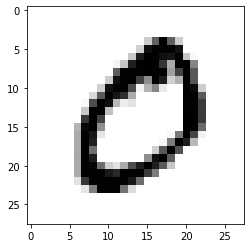

Number of datapoints: 14780



In [26]:
digit0='0'
digit1='1'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print("Number of datapoints: {}\n".format(len(mnist_bin_data)))


**Exercise 1:** Split the mnist_bin data into training and test set. Learn different SVM models by varying the kernel functions (SVM). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. 

You can get the current time using:

`import time` <br>
`now = time.time()`

*Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels. What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [27]:
def binaryTrain(mnist, digit0, digit1, model, num_misclass):

    mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
    mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
    
    sc = MinMaxScaler()
    features_train = sc.fit_transform(mnist_bin_data)
    
    x_train,x_test,y_train,y_test = train_test_split(features_train,mnist_bin_target, test_size=.3)
    
    bf = time.time()
    model.fit(x_train, y_train)
    now = time.time()
    
    pred_labels_train = model.predict(x_train)
    pred_labels_test = model.predict(x_test)
    
    print("Accuracy train: {}".format(accuracy_score(y_train,pred_labels_train)))
    print("Accuracy test: {}".format(accuracy_score(y_test,pred_labels_test)))
    print("Time taken: {:.3} seconds".format(now-bf))
    
    misclass = np.where(y_test != pred_labels_test)[0]
    print("Misclassifications ({}):".format(len(misclass)))
    
    for i in range(num_misclass):
        if (i < len(misclass)):
            print("Data instance: {} \n".format(misclass[i]))
            plt.imshow(mnist_bin_data[misclass[i]].reshape(28,28),cmap=plt.cm.gray_r)
            plt.show()
    
    return accuracy_score(y_test,pred_labels_test), now-bf

## SVM trials with different types of kernels

In [28]:
linearAcc = []
linearTime = []
polyAcc = []
polyTime = []
rbfAcc = []
rbfTime = []

### SVM with 'linear' kernel

Accuracy train: 1.0
Accuracy test: 0.9986468200270636
Time taken: 0.365 seconds
Misclassifications (6):
Data instance: 1279 



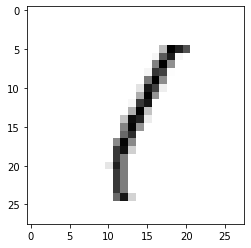

Data instance: 2089 



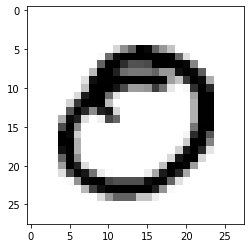

In [29]:
a, t = binaryTrain(mnist, '0', '1', SVC(kernel='linear'), 2)
linearAcc += [a]
linearTime += [t]

Accuracy train: 0.9991299619358347
Accuracy test: 0.989345509893455
Time taken: 1.3 seconds
Misclassifications (42):
Data instance: 2 



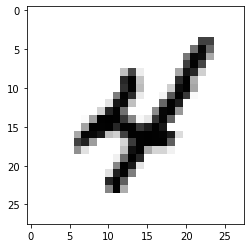

Data instance: 214 



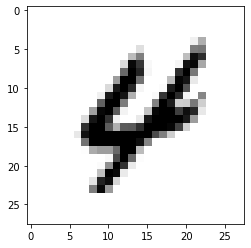

In [30]:
a, t = binaryTrain(mnist, '4', '5', SVC(kernel='linear'), 2)
linearAcc += [a]
linearTime += [t]

Accuracy train: 0.9818944353518821
Accuracy test: 0.9637231503579953
Time taken: 6.69 seconds
Misclassifications (152):
Data instance: 30 



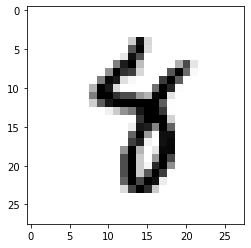

Data instance: 96 



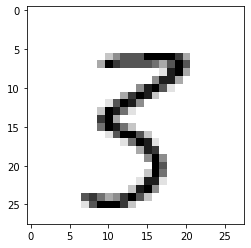

In [31]:
a, t = binaryTrain(mnist, '3', '8', SVC(kernel='linear'), 2)
linearAcc += [a]
linearTime += [t]

We see that for these three cases (0 vs. 1, 4 vs. 5 and 3 vs. 8) it progressively gets longer and harder to classify. However, the linear kernel does a very good job as it remains above 95% accuracy.

### SVM with 'poly' kernel

Accuracy train: 0.9992267543011792
Accuracy test: 0.998872350022553
Time taken: 0.929 seconds
Misclassifications (5):
Data instance: 270 



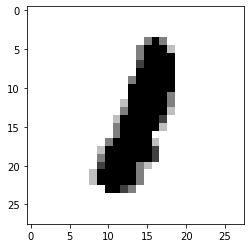

Data instance: 1358 



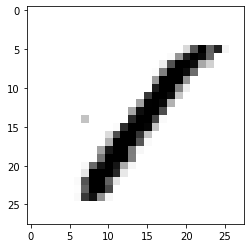

In [32]:
a, t = binaryTrain(mnist, '0', '1', SVC(kernel='poly'), 2)
polyAcc += [a]
polyTime += [t]

Accuracy train: 0.9995649809679173
Accuracy test: 0.9987316083206494
Time taken: 2.08 seconds
Misclassifications (5):
Data instance: 58 



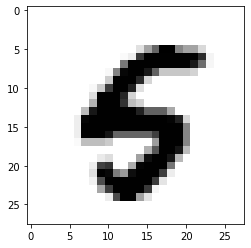

Data instance: 1309 



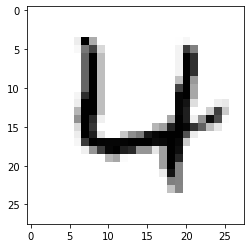

In [33]:
a, t = binaryTrain(mnist, '4', '5', SVC(kernel='poly'), 2)
polyAcc += [a]
polyTime += [t]

Accuracy train: 0.9977495908346972
Accuracy test: 0.9883054892601432
Time taken: 3.82 seconds
Misclassifications (49):
Data instance: 73 



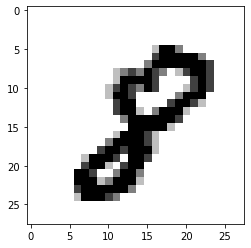

Data instance: 189 



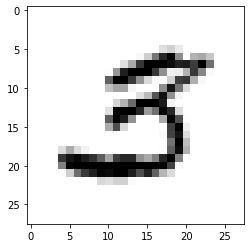

In [34]:
a, t = binaryTrain(mnist, '3', '8', SVC(kernel='poly'), 2)
polyAcc += [a]
polyTime += [t]

Using a polynomial function as a kernel yields even better results. It takes less time than the linear kernel and it obtains a better accuracy.

### SVM with 'rbf' (exponential) kernel

Accuracy train: 0.9998066885752948
Accuracy test: 0.9993234100135318
Time taken: 0.726 seconds
Misclassifications (3):
Data instance: 1146 



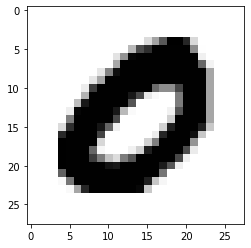

Data instance: 3110 



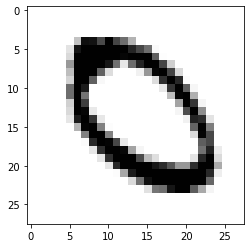

In [35]:
a, t = binaryTrain(mnist, '0', '1', SVC(kernel='rbf'), 2)
rbfAcc += [a]
rbfTime += [t]

Accuracy train: 0.9995649809679173
Accuracy test: 0.9974632166412988
Time taken: 1.81 seconds
Misclassifications (10):
Data instance: 202 



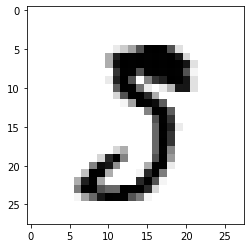

Data instance: 1077 



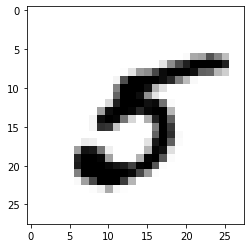

In [36]:
a, t = binaryTrain(mnist, '4', '5', SVC(kernel='rbf'), 2)
rbfAcc += [a]
rbfTime += [t]

Accuracy train: 0.9946808510638298
Accuracy test: 0.990692124105012
Time taken: 4.31 seconds
Misclassifications (39):
Data instance: 29 



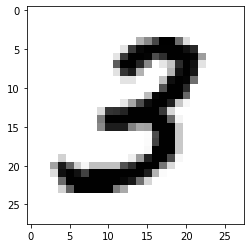

Data instance: 92 



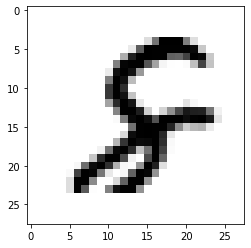

In [37]:
a, t = binaryTrain(mnist, '3', '8', SVC(kernel='rbf'), 2)
rbfAcc += [a]
rbfTime += [t]

### Graph visualization

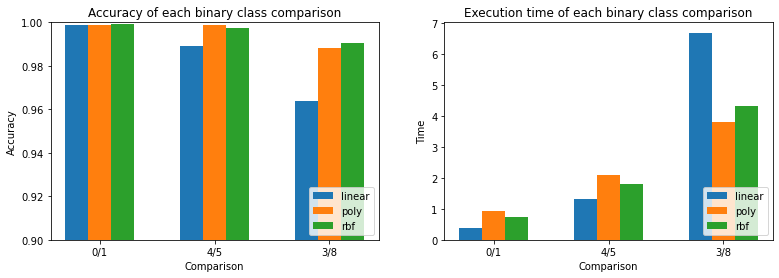

In [38]:
names = ['linear', 'poly', 'rbf']

X_axis = np.arange(len(names))

plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(X_axis-0.2, linearAcc, 0.2, label="linear")
plt.bar(X_axis, polyAcc, 0.2, label ="poly")
plt.bar(X_axis+0.2, rbfAcc, 0.2, label ="rbf")
plt.xticks(X_axis, ['0/1', '4/5', '3/8'])
plt.ylim([0.9,1])
plt.legend(loc = 'lower right')
plt.xlabel("Comparison")
plt.ylabel("Accuracy")
plt.title("Accuracy of each binary class comparison")
plt.subplot(132)
plt.bar(X_axis-0.2, linearTime, 0.2, label="linear")
plt.bar(X_axis, polyTime, 0.2, label ="poly")
plt.bar(X_axis+0.2, rbfTime, 0.2, label ="rbf")
plt.xticks(X_axis, ['0/1', '4/5', '3/8'])
plt.legend(loc = 'lower right')
plt.xlabel("Comparison")
plt.ylabel("Time")
plt.title("Execution time of each binary class comparison")
plt.show()

## Experimenting with the whole dataset

In [7]:
def allTrain(data, target, model):
    
    sc = MinMaxScaler()
    features_train = sc.fit_transform(data)
    
    x_train,x_test,y_train,y_test = train_test_split(features_train,target, test_size=.3)
    
    bf = time.time()
    model.fit(x_train, y_train)
    now = time.time()
    
    pred_labels_train = model.predict(x_train)
    pred_labels_test = model.predict(x_test)
    
    print("Accuracy train: {}".format(accuracy_score(y_train,pred_labels_train)))
    print("Accuracy test: {}".format(accuracy_score(y_test,pred_labels_test)))
    print("Time taken: {:.3} seconds".format(now-bf))
    
    misclass = np.where(y_test != pred_labels_test)[0]
    print("Misclassifications ({}):".format(len(misclass)))
    
    return y_test, pred_labels_test

In [40]:
truelabels, predlabels = allTrain(mnist.data, mnist.target, SVC(kernel = 'linear'))

Accuracy train: 0.9754489795918367
Accuracy test: 0.9325238095238095
Time taken: 1.09e+02 seconds
Misclassifications (1417):


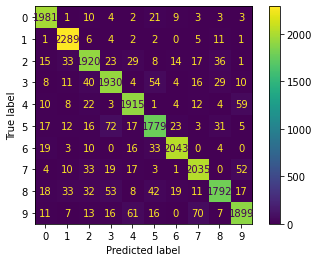

In [41]:
labs = ['0','1','2','3','4','5','6','7','8','9']

cm = confusion_matrix(truelabels, predlabels, labels=labs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=labs)
disp.plot()

**Exercise 2:** In the experiments done in Exercise 1 you applied generic "off-the-shelf" kernels to the original data representation given by a 28 x 28 matrix. Can you think of other data transformations that are more directly targeted at constructing features that are informative for the character recognition task (remember e.g. the exercise from last week to construct features for making the x-or data linearly separable)? You should consider the following two approaches:<br>

**a)** Manually design feature functions for which you expect that based on your new features SVM classifiers can achieve a better accuracy than with the original features (ideally, given the new features, only a linear SVM then is needed). Transform the data into your new feature space, and learn new classifiers. What accuracies do you get? It is not expected that you get higher accuracies than with the best SVM from Exercise 1. What you should aim for is that you get better accuracies when you apply a linear SVM to your transformed data, than when you apply a linear SVM to the original data.

**b)** Instead of designing an explicit feature mapping as in **a)**, define a suitable measure of similarity for the digits, and implement that measure as a kernel function. (Optional: verify that the function you have defined actually satisfies the positive-semidefiniteness property.) Use your kernel function as a custom kernel for the SVC classifier.  See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example.

### Section a)

In [42]:
# these FEATURE functions compute the pixel value of each row (or each two rows)

def twoRowsAtATime(img):
    image = img.reshape(14,56)
    res = np.sum(image, axis = 1)
    res = res / max(res)
    return res

def twoColumnsAtATime(img):
    image = img.reshape(56,14)
    res = np.sum(image, axis = 0)
    res = res / max(res)
    return res

def oneRowAtATime(img):
    image = img.reshape(28, 28)
    res = np.sum(image, axis = 1)
    res = res / max(res)
    return res

In [43]:
# these functions use the functions defined above and they iterate through the whole data.

def twoRowsFeatureTransform(data):
    res = []
    for i in data:
        res.append(twoRowsAtATime(i))
    return res

def oneRowFeatureTransform(data):
    res = []
    for i in data:
        res.append(oneRowAtATime(i))
    return res

In [44]:
# very simple feature transformation in which we compute the number of black, white, and gray pixels.

def simpleFeatureTransform(data):
    res = []
    for i in data:
        res.append(len(np.where(i < 10)[0]))
        res.append(len(np.where(i > 200)[0]))
        res.append(len(np.where((i > 10) & (i < 200))[0]))
    return res

In [45]:
# feature that separates the 28x28 image into regions specified by divisions. We get the average for each.

def gridFeatureTransform(data, divisions):
    dimension = 28
    separations = np.arange(0,dimension, dimension/divisions)
    separations = np.append(separations, [dimension-1])
    separations = np.floor(separations)
    separations = separations.astype(int)
    
    allRes = []
    for d in data:
        res = []
        image = d.reshape(28,28)
        for i in range(len(separations)-1):
            for j in range(len(separations)-1):
                #print("Separation: i: {}; j: {}->{}".format(separations[i], separations[j], separations[j+1]) )
                res.append(np.mean(image[separations[i], np.array(np.arange(separations[j],separations[j+1]))]))
        allRes.append(res)
    
    return allRes

Accuracy train: 0.7546530612244898
Accuracy test: 0.759095238095238
Time taken: 18.8 seconds
Misclassifications (5059):


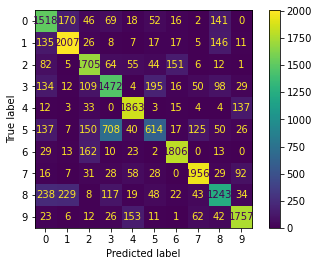

In [46]:
true, pred = allTrain(twoRowsFeatureTransform(mnist.data), mnist.target, SVC(kernel='linear'))

labs = ['0','1','2','3','4','5','6','7','8','9']

cm = confusion_matrix(true, pred, labels=labs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=labs)
disp.plot()

Accuracy train: 0.29906122448979594
Accuracy test: 0.2958571428571429
Time taken: 59.0 seconds
Misclassifications (14787):


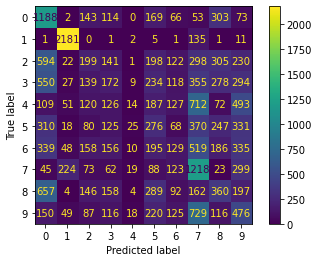

In [47]:
true, pred = allTrain(np.array(simpleFeatureTransform(mnist.data)).reshape(-1,3), mnist.target, SVC(kernel='linear'))

labs = ['0','1','2','3','4','5','6','7','8','9']

cm = confusion_matrix(true, pred, labels=labs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=labs)
disp.plot()

Accuracy train: 0.7658163265306123
Accuracy test: 0.7648095238095238
Time taken: 26.0 seconds
Misclassifications (4939):


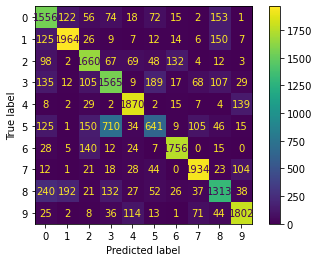

In [48]:
true, pred = allTrain(oneRowFeatureTransform(mnist.data), mnist.target, SVC(kernel='linear'))

labs = ['0','1','2','3','4','5','6','7','8','9']

cm = confusion_matrix(true, pred, labels=labs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=labs)
disp.plot()

Accuracy train: 0.5683673469387756
Accuracy test: 0.5704285714285714
Time taken: 39.0 seconds
Misclassifications (9021):


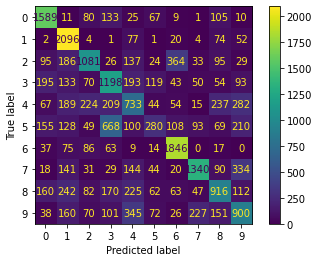

In [49]:
true, pred = allTrain(gridFeatureTransform(mnist.data,3), mnist.target, SVC(kernel='linear'))

labs = ['0','1','2','3','4','5','6','7','8','9']

cm = confusion_matrix(true, pred, labels=labs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=labs)
disp.plot()

Accuracy train: 0.914734693877551
Accuracy test: 0.9068095238095238
Time taken: 21.2 seconds
Misclassifications (1957):


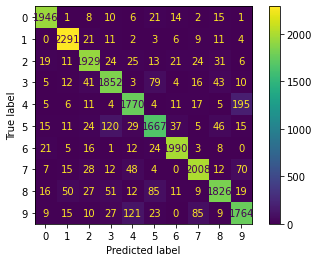

In [50]:
true, pred = allTrain(gridFeatureTransform(mnist.data,9), mnist.target, SVC(kernel='linear'))

labs = ['0','1','2','3','4','5','6','7','8','9']

cm = confusion_matrix(true, pred, labels=labs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=labs)
disp.plot()

### Section b)

In [5]:
def dotp_kernel(X, Y):
    return np.dot(X, Y.T)

In [8]:
true, pred = allTrain(mnist.data, mnist.target, SVC(kernel=dotp_kernel))

Accuracy train: 0.9738979591836735
Accuracy test: 0.9329047619047619
Time taken: 40.1 seconds
Misclassifications (1409):


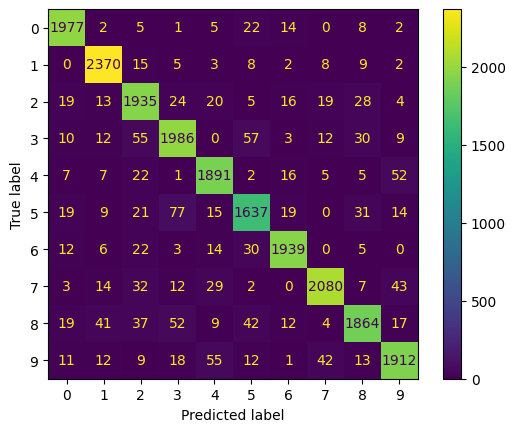

In [9]:
labs = ['0','1','2','3','4','5','6','7','8','9']

cm = confusion_matrix(true, pred, labels=labs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=labs)
disp.plot()

In [11]:
def dotp_kernel_cos(X, Y):
    return np.cos(np.dot(X, Y.T))

In [12]:
true, pred = allTrain(mnist.data, mnist.target, SVC(kernel=dotp_kernel))

KeyboardInterrupt: 

In [ ]:
labs = ['0','1','2','3','4','5','6','7','8','9']

cm = confusion_matrix(true, pred, labels=labs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=labs)
disp.plot()